In [308]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt 
import operator
import math

In [40]:
folder = 'ml-100k/'
m_cols = ['movie_id','movie title','release date','video release date','IMDb URL'
          ,'unknown','Action','Adventure','Animation','Childrens','Comedy',
          'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
        'Thriller','War','Western']
data= pd.read_csv(folder+'u.item',delimiter='|',names=m_cols,encoding='latin-1')
data.shape
np.random.seed(1002)


In [41]:
data.head()

,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Childrens           1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [138]:
#number of unique movies
movies = data['movie_id'].unique().tolist()
num_items = len(movies)
num_items
movies

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [44]:
u_cols = ['user_id','age','gender','occupation','zip_code']
data_u = pd.read_csv(folder+'u.user',delimiter='|',names=u_cols,encoding='latin-1')
data_u.shape

(943, 5)

In [45]:
data_u.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [46]:
users = data_u['user_id'].unique().tolist()
num_users = len(users)
num_users

943

In [47]:
r_cols = ['user_id','movie_id','rating','timestamp']
data_r = pd.read_csv(folder+'u.data',delimiter='\t',names=r_cols,encoding='latin-1')
data_r.shape

(100000, 4)

In [48]:
data_r.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [49]:
num_ratings = data_r.shape[0]
num_ratings

100000

In [50]:
rec_matrix_size = num_users * num_items
sparsity = 1 - num_ratings / rec_matrix_size
sparsity

0.9369533063577546

In [51]:
movie_data_ratings_data=data.merge(data_r,on = 'movie_id',how = 'inner')
movie_data_ratings_data.head()
movie_data_ratings_data['user_id'] == None
movie_data_ratings_data[movie_data_ratings_data['movie_id'] == 242]
movie_data_ratings_data.shape

(100000, 27)

In [52]:
#displays high rated movies
high_rated= movie_data_ratings_data['rating']==5.0
movie_data_ratings_data[high_rated].head(10)

,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,rating,timestamp
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,287,5,875334088
8,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,95,5,879197329
10,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,189,5,893264174
22,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,340,5,884990988
32,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,43,5,875975579
37,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,38,5,892430636
39,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,96,5,884403574
41,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,157,5,874813703
48,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,18,5,880130802
51,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,45,5,881013176


In [53]:
genres = ['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
genres_count = {}
for genre in genres:
    count = 0
    genre_movies = movie_data_ratings_data[genre] == 1
    genres_count[genre] = movie_data_ratings_data[genre_movies].shape[0]

print(genres_count)
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)
print(genres_count_list)

{'unknown': 10, 'Action': 25589, 'Adventure': 13753, 'Animation': 3605, 'Childrens': 7182, 'Comedy': 29832, 'Crime': 8055, 'Documentary': 758, 'Drama': 39895, 'Fantasy': 1352, 'Film-Noir': 1733, 'Horror': 5317, 'Musical': 4954, 'Mystery': 5245, 'Romance': 19461, 'Sci-Fi': 12730, 'Thriller': 21872, 'War': 9398, 'Western': 1854}
[('Drama', 39895), ('Comedy', 29832), ('Action', 25589), ('Thriller', 21872), ('Romance', 19461), ('Adventure', 13753), ('Sci-Fi', 12730), ('War', 9398), ('Crime', 8055), ('Childrens', 7182), ('Horror', 5317), ('Mystery', 5245), ('Musical', 4954), ('Animation', 3605), ('Western', 1854), ('Film-Noir', 1733), ('Fantasy', 1352), ('Documentary', 758), ('unknown', 10)]


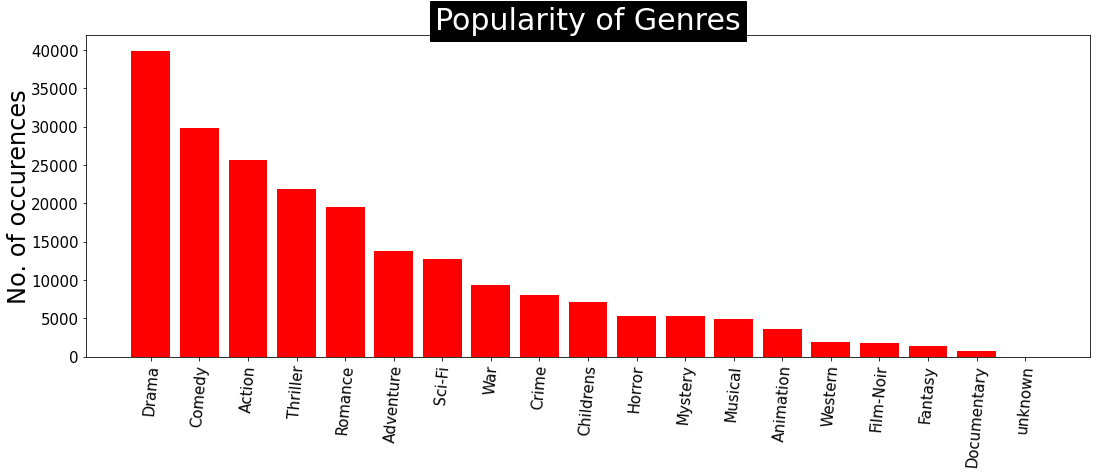

In [54]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

##### So far I used Dr. Asnat Messica  to to show ditribution of high ratings per genre, and to generae the merged DF of movies + ratings

so to be specific


# QUESTION 1

### Sparsity distribution of number of ratings 

In [55]:
sparsity = 1 - num_ratings / rec_matrix_size
sparsity

0.9369533063577546

In [56]:
ratings = range(1,6)
ratings_count = {}
for r in ratings:
    count = 0
    current_rating = movie_data_ratings_data['rating'] == r
    ratings_count[r] = movie_data_ratings_data[current_rating].shape[0]

print(ratings_count)
# genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)
# print(genres_count_list)
ratings_count_list = sorted(ratings_count.items(), key=operator.itemgetter(1),reverse=True)
print(ratings_count_list)

{1: 6110, 2: 11370, 3: 27145, 4: 34174, 5: 21201}
[(4, 34174), (3, 27145), (5, 21201), (2, 11370), (1, 6110)]


### distribution of ratings

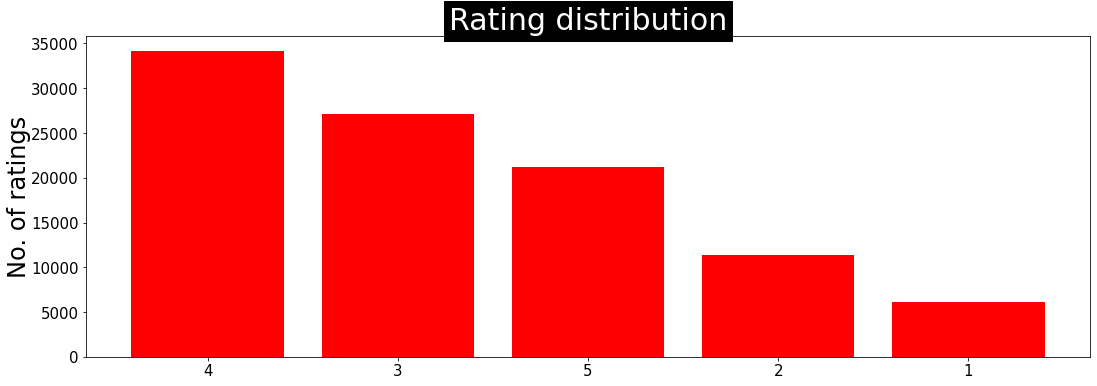

In [57]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in ratings_count_list]
x_axis = [i for i in range(len(ratings_count_list))]
x_label = [r[0] for r in ratings_count_list]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of ratings", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Rating distribution",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

### Average rating per user

In [58]:
users_avg_ratings =  movie_data_ratings_data.groupby('user_id')['rating'].mean().reset_index()
users_avg_ratings.sort_values(by=['rating'], ascending=False).head()

,user_id,rating
848,849,4.869565
687,688,4.833333
506,507,4.724138
627,628,4.703704
927,928,4.687500


### Average rating per movie

In [59]:
users_avg_ratings =  movie_data_ratings_data.groupby('movie title')['rating'].mean().reset_index()
users_avg_ratings.head()
users_avg_ratings.sort_values(by=['rating'], ascending=False).head()

,movie title,rating
1472,They Made Me a Criminal (1939),5.0
944,Marlene Dietrich: Shadow and Light (1996),5.0
1273,"Saint of Fort Washington, The (1993)",5.0
1359,Someone Else's America (1995),5.0
1387,Star Kid (1997),5.0


# QUESTION 2

In [176]:
users_ratings = {}


{(1, 1): 5,
 (1, 2): 3,
 (1, 3): 4,
 (1, 4): 3,
 (1, 5): 3,
 (1, 6): 5,
 (1, 7): 4,
 (1, 8): 1,
 (1, 9): 5,
 (1, 10): 3,
 (1, 11): 2,
 (1, 12): 5,
 (1, 13): 5,
 (1, 14): 5,
 (1, 15): 5,
 (1, 16): 5,
 (1, 17): 3,
 (1, 18): 4,
 (1, 19): 5,
 (1, 20): 4,
 (1, 21): 1,
 (1, 22): 4,
 (1, 23): 4,
 (1, 24): 3,
 (1, 25): 4,
 (1, 26): 3,
 (1, 27): 2,
 (1, 28): 4,
 (1, 29): 1,
 (1, 30): 3,
 (1, 31): 3,
 (1, 32): 5,
 (1, 33): 4,
 (1, 34): 2,
 (1, 35): 1,
 (1, 36): 2,
 (1, 37): 2,
 (1, 38): 3,
 (1, 39): 4,
 (1, 40): 3,
 (1, 41): 2,
 (1, 42): 5,
 (1, 43): 4,
 (1, 44): 5,
 (1, 45): 5,
 (1, 46): 4,
 (1, 47): 4,
 (1, 48): 5,
 (1, 49): 3,
 (1, 50): 5,
 (1, 51): 4,
 (1, 52): 4,
 (1, 53): 3,
 (1, 54): 3,
 (1, 55): 5,
 (1, 56): 4,
 (1, 57): 5,
 (1, 58): 4,
 (1, 59): 5,
 (1, 60): 5,
 (1, 61): 4,
 (1, 62): 3,
 (1, 63): 2,
 (1, 64): 5,
 (1, 65): 4,
 (1, 66): 4,
 (1, 67): 3,
 (1, 68): 4,
 (1, 69): 3,
 (1, 70): 3,
 (1, 71): 3,
 (1, 72): 4,
 (1, 73): 3,
 (1, 74): 1,
 (1, 75): 4,
 (1, 76): 4,
 (1, 77): 4,
 (1, 78)

In [142]:
movies_rating = {}
for m in range(1, num_items):
    current_rating = movie_data_ratings_data['movie_id'] == m
    movies_rating[m] = dict(zip(movie_data_ratings_data[current_rating].user_id,movie_data_ratings_data[current_rating].rating))
movies_rating

{1: {308: 4,
  287: 5,
  148: 4,
  280: 4,
  66: 3,
  5: 4,
  109: 4,
  181: 3,
  95: 5,
  268: 3,
  189: 5,
  145: 3,
  158: 4,
  67: 3,
  232: 4,
  150: 4,
  289: 3,
  117: 4,
  49: 2,
  223: 4,
  56: 4,
  17: 4,
  340: 5,
  177: 3,
  194: 4,
  250: 4,
  213: 2,
  350: 4,
  348: 4,
  131: 4,
  106: 4,
  234: 3,
  43: 5,
  20: 3,
  246: 4,
  94: 4,
  279: 3,
  38: 5,
  128: 4,
  96: 5,
  203: 3,
  157: 5,
  311: 4,
  125: 4,
  286: 4,
  83: 4,
  301: 4,
  345: 3,
  18: 5,
  322: 2,
  64: 4,
  45: 5,
  247: 4,
  204: 2,
  271: 3,
  41: 4,
  274: 4,
  222: 4,
  15: 1,
  23: 5,
  141: 3,
  359: 4,
  374: 4,
  380: 4,
  10: 4,
  320: 3,
  160: 4,
  396: 4,
  339: 5,
  199: 1,
  422: 3,
  81: 4,
  42: 5,
  357: 5,
  26: 3,
  327: 4,
  200: 5,
  44: 4,
  256: 5,
  174: 3,
  97: 4,
  243: 4,
  101: 3,
  490: 3,
  242: 4,
  312: 5,
  325: 2,
  456: 2,
  347: 4,
  360: 3,
  450: 4,
  84: 2,
  198: 4,
  494: 3,
  525: 4,
  2: 4,
  62: 2,
  343: 5,
  298: 5,
  459: 4,
  407: 4,
  471: 4,
  535: 

In [137]:
movies_rating

{942: {896: 3}}

In [148]:
a= movie_data_ratings_data[(movie_data_ratings_data.movie_id == 1) & (movie_data_ratings_data.user_id == 5)]
a.rating

5    4
Name: rating, dtype: int64

### QUESTION 2 - GD impl

In [327]:
num_users = len(users)
num_movies = len(movies)

In [353]:
user_movie_rating = {}
for u in range(1,num_users):
    current_rating = movie_data_ratings_data['user_id'] == u
    users_ratings[u] = dict(zip(movie_data_ratings_data[current_rating].movie_id,movie_data_ratings_data[current_rating].rating))
    for [movie_id, rating] in users_ratings[u].items():
        user_movie_rating[(u, movie_id)] = rating
user_movie_rating


{(1, 1): 5,
 (1, 2): 3,
 (1, 3): 4,
 (1, 4): 3,
 (1, 5): 3,
 (1, 6): 5,
 (1, 7): 4,
 (1, 8): 1,
 (1, 9): 5,
 (1, 10): 3,
 (1, 11): 2,
 (1, 12): 5,
 (1, 13): 5,
 (1, 14): 5,
 (1, 15): 5,
 (1, 16): 5,
 (1, 17): 3,
 (1, 18): 4,
 (1, 19): 5,
 (1, 20): 4,
 (1, 21): 1,
 (1, 22): 4,
 (1, 23): 4,
 (1, 24): 3,
 (1, 25): 4,
 (1, 26): 3,
 (1, 27): 2,
 (1, 28): 4,
 (1, 29): 1,
 (1, 30): 3,
 (1, 31): 3,
 (1, 32): 5,
 (1, 33): 4,
 (1, 34): 2,
 (1, 35): 1,
 (1, 36): 2,
 (1, 37): 2,
 (1, 38): 3,
 (1, 39): 4,
 (1, 40): 3,
 (1, 41): 2,
 (1, 42): 5,
 (1, 43): 4,
 (1, 44): 5,
 (1, 45): 5,
 (1, 46): 4,
 (1, 47): 4,
 (1, 48): 5,
 (1, 49): 3,
 (1, 50): 5,
 (1, 51): 4,
 (1, 52): 4,
 (1, 53): 3,
 (1, 54): 3,
 (1, 55): 5,
 (1, 56): 4,
 (1, 57): 5,
 (1, 58): 4,
 (1, 59): 5,
 (1, 60): 5,
 (1, 61): 4,
 (1, 62): 3,
 (1, 63): 2,
 (1, 64): 5,
 (1, 65): 4,
 (1, 66): 4,
 (1, 67): 3,
 (1, 68): 4,
 (1, 69): 3,
 (1, 70): 3,
 (1, 71): 3,
 (1, 72): 4,
 (1, 73): 3,
 (1, 74): 1,
 (1, 75): 4,
 (1, 76): 4,
 (1, 77): 4,
 (1, 78)

In [384]:
def data_into_R(name):
    data= pd.read_csv(folder+name, delim_whitespace=True, header=None)
    R = {}
    for i in range(len(data)):
        R[(data.loc[i][0], data.loc[i][1])] = data.loc[i][2]
    return R

In [401]:
def calculate_rmse(U,V,R): 
    UV_T = U.dot(V.T)
    total = 0
    err = 0
    for i in range(num_users):
        for j in range(num_movies):
            t = (i, j)
            if t in R:
                total+=1
                err += (R[t] - UV_T.loc[i,j]) ** 2
    return math.sqrt(err / total)

In [535]:
def GD(alpha, K, lamnda_regularization, rounds):
    FOLD = 5
    results = {}
    fold_range = range(1, FOLD + 1)
    for fold in fold_range:
        U = pd.DataFrame(np.random.rand(num_users,K))
        V = pd.DataFrame(np.random.rand(num_movies,K))
        train_name = 'u%d.base' % (fold)
        test_name = 'u%d.test' % (fold)
        R = data_into_R(train_name)
        round = 0
        rmse_errors = []
        while round < rounds:
            UV_T = U.dot(V.T)
            for i in range(1, num_users):
                for q in range(K):
                    err_user_component = 0
                    for j in range(1, num_movies):
                        if (i,j) in R:
                            e_ij = R[(i,j)] - UV_T.loc[i, j]
                            err_user_component += V.loc[j,q] * e_ij
                    U.loc[i,q] += alpha * (err_user_component - lamnda_regularization * U.loc[i,q])
#             UV_T = U.dot(V.T)
            for movie_id in range(1, num_movies):
                for q in range(K): 
                    err_movie_component = 0
                    for user_id in range(1, num_users):
                        if (user_id,movie_id) in R:
                            e_ij = R[(user_id,movie_id)] - UV_T.loc[user_id, movie_id]
                            err_movie_component += U.loc[user_id,q] * e_ij
                    V.loc[movie_id, q] +=  alpha * (err_movie_component - lamnda_regularization * V.loc[movie_id, q])
            current_rmse = calculate_rmse(U,V, R)
            rmse_errors.append([round, current_rmse])
            print('fold: %d round: %d RMSE %f'% (fold, round ,current_rmse))
            round+=1
        R_test = data_into_R(test_name)
        rmse_test_result = calculate_rmse(U,V, R_test)
        print('fold: %d test RMSE %f'% (fold, rmse_test_result))
        results[fold] = {'test_error': rmse_test_result, 'training_errors': rmse_errors,'alpha': alpha ,'lamnda_regularization': lamnda_regularization, 'K': K}
    sum_erros = 0
    for fold in fold_range:
        sum_erros+=results[fold]['test_error']
    results['test_result'] = sum_erros / FOLD
    return results
            


In [536]:
'u%d.base' % (1)
alphas = [0.00025, 0.0002, 0.0003]
lamnda_regularizations = [0.002, 0.001, 0.005]
Ks = [10, 20, 50]
results = []
for a in alphas:
    for r in lamnda_regularizations:
        for k in Ks:
            res = GD(a,k,r,20)
            results.append(res)



fold: 1 round: 0 RMSE 1.497563
fold: 1 round: 1 RMSE 1.384115
fold: 1 round: 2 RMSE 1.301001
fold: 1 round: 3 RMSE 1.240088
fold: 1 round: 4 RMSE 1.194710
fold: 1 round: 5 RMSE 1.160046
fold: 1 round: 6 RMSE 1.132831
fold: 1 round: 7 RMSE 1.110915
fold: 1 round: 8 RMSE 1.092878
fold: 1 round: 9 RMSE 1.077761
fold: 1 round: 10 RMSE 1.064900
fold: 1 round: 11 RMSE 1.053817
fold: 1 round: 12 RMSE 1.044163
fold: 1 round: 13 RMSE 1.035674
fold: 1 round: 14 RMSE 1.028147
fold: 1 round: 15 RMSE 1.021422
fold: 1 round: 16 RMSE 1.015373
fold: 1 round: 17 RMSE 1.009901
fold: 1 round: 18 RMSE 1.004922
fold: 1 round: 19 RMSE 1.000369
fold: 1 test RMSE 1.055771
fold: 2 round: 0 RMSE 1.532784
fold: 2 round: 1 RMSE 1.409130
fold: 2 round: 2 RMSE 1.317717
fold: 2 round: 3 RMSE 1.250683
fold: 2 round: 4 RMSE 1.201128
fold: 2 round: 5 RMSE 1.163768
fold: 2 round: 6 RMSE 1.134882
fold: 2 round: 7 RMSE 1.111958
fold: 2 round: 8 RMSE 1.093323
fold: 2 round: 9 RMSE 1.077854
fold: 2 round: 10 RMSE 1.064786
f

fold: 3 round: 10 RMSE 1.691810
fold: 3 round: 11 RMSE 1.651182
fold: 3 round: 12 RMSE 1.615154
fold: 3 round: 13 RMSE 1.582838
fold: 3 round: 14 RMSE 1.553572
fold: 3 round: 15 RMSE 1.526852
fold: 3 round: 16 RMSE 1.502285
fold: 3 round: 17 RMSE 1.479563
fold: 3 round: 18 RMSE 1.458438
fold: 3 round: 19 RMSE 1.438707
fold: 3 test RMSE 1.599688
fold: 4 round: 0 RMSE 4.130384
fold: 4 round: 1 RMSE 3.129457
fold: 4 round: 2 RMSE 2.650241
fold: 4 round: 3 RMSE 2.362169
fold: 4 round: 4 RMSE 2.170828
fold: 4 round: 5 RMSE 2.035344
fold: 4 round: 6 RMSE 1.933810
fold: 4 round: 7 RMSE 1.854087
fold: 4 round: 8 RMSE 1.789100
fold: 4 round: 9 RMSE 1.734561
fold: 4 round: 10 RMSE 1.687755
fold: 4 round: 11 RMSE 1.646864
fold: 4 round: 12 RMSE 1.610632
fold: 4 round: 13 RMSE 1.578149
fold: 4 round: 14 RMSE 1.548743
fold: 4 round: 15 RMSE 1.521905
fold: 4 round: 16 RMSE 1.497238
fold: 4 round: 17 RMSE 1.474431
fold: 4 round: 18 RMSE 1.453234
fold: 4 round: 19 RMSE 1.433443
fold: 4 test RMSE 1.602

KeyboardInterrupt: 

In [540]:
len(results)

2

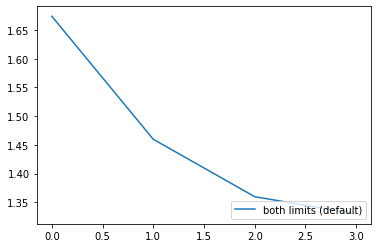

In [351]:
results['errors']
errors = [ 1.674002, 1.459865, 1.359865, 1.329865]
fig = plt.figure()
x = range(len(errors))
y = errors
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x,y , label='both limits (default)')
plt.legend(loc='lower right')


### QUESTION 2 - ALS impl

In [437]:
def init_R(name):
    data= pd.read_csv(folder+name, delim_whitespace=True, header=None)
    R = pd.DataFrame(np.zeros((num_users,num_movies)))   
    for i in range(len(data)):
        R.loc[data.loc[i][0], data.loc[i][1]] = data.loc[i][2]
    return R

In [483]:
K = 5
def ALS(K):
    FOLDS = 1
    folds_range = range(1, FOLDS + 1)
    for fold in folds_range:
        U = pd.DataFrame(np.random.rand(num_users,K))
        V = pd.DataFrame(np.random.rand(num_movies,K))
        train_name = 'u%d.base' % (fold)
        test_name = 'u%d.test' % (fold)
        R = init_R(train_name)
        for user_id in range(num_users):
            1
                
    
R = pd.DataFrame(np.zeros((num_users,num_movies)))
R = init_R('u1.base')
V = pd.DataFrame(np.random.rand(num_movies + 1 ,K))
U = pd.DataFrame(np.random.rand(num_users + 1,K))


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 0, dtype: float64

In [499]:
V = pd.DataFrame(np.random.rand(2 ,2))
R = pd.DataFrame(np.random.rand(2 ,2))


R.loc[0].shape

(2,)

In [528]:
df = pd.DataFrame([[0,0,0,0], [1, 1, 1, 1]])
df = df.T
s = pd.Series([3,5])

a.dot(b)

array([16,  6])

In [533]:
df = pd.DataFrame(a)
s = pd.Series(b)

df.values.dot(s.values)


array([16,  6])

In [305]:
matrix1 = [(1, 1),
          (0, 2),
          (0, 2)];

 

matrix2 = [(2, 0),

           (1, 1),
           (1, 1)           

           ];

# Data loaded into pandas DataFrames

dataFrame1 = pd.DataFrame(data=matrix1);

dataFrame2 = pd.DataFrame(data=matrix2);

 

print("Matrix1:");

print(dataFrame1);

print("Dimension:");

print(dataFrame1.shape);

 

print("Matrix2:");

print(dataFrame2);

print("Dimension:");

print(dataFrame2.shape);

 

# Multiply the matrices: Matrix1 and Matrix2



Matrix1:
   0  1
0  1  1
1  0  2
2  0  2
Dimension:
(3, 2)
Matrix2:
   0  1
0  2  0
1  1  1
2  1  1
Dimension:
(3, 2)


In [306]:
result = dataFrame1.dot(dataFrame2.T);

result

,0,1,2
0,2,2,2
1,0,2,2
2,0,2,2
